In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)
import collections

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 

In [3]:
# Создание датафрейма с dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out

# Некоторые значения признаков есть в тесте, но нет в трейне и наоборот
def intersect_features(train, test):
    common_feat = list( set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]
features = ['Внешность', 'Алкоголь_в_напитке',
            'Уровень_красноречия', 'Потраченные_деньги']

In [4]:
df_train = {}
df_train['Внешность'] = ['приятная', 'приятная', 'приятная', 'отталкивающая',
                         'отталкивающая', 'отталкивающая', 'приятная'] 
df_train['Алкоголь_в_напитке'] = ['да', 'да', 'нет', 'нет', 'да', 'да', 'да']
df_train['Уровень_красноречия'] = ['высокий', 'низкий', 'средний', 'средний', 'низкий',
                                   'высокий', 'средний']
df_train['Потраченные_деньги'] = ['много', 'мало', 'много', 'мало', 'много',
                                  'много', 'много']
df_train['Поедет'] = LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])

df_train = create_df(df_train, features)
df_train
y_train =df_train['Поедет'] 
df_train

,Поедет,Внешность_отталкивающая,Внешность_приятная,Алкоголь_в_напитке_да,Алкоголь_в_напитке_нет,Уровень_красноречия_высокий,Уровень_красноречия_низкий,Уровень_красноречия_средний,Потраченные_деньги_мало,Потраченные_деньги_много
0,0,0,1,1,0,1,0,0,0,1
1,1,0,1,1,0,0,1,0,1,0
2,0,0,1,0,1,0,0,1,0,1
3,1,1,0,0,1,0,0,1,1,0
4,1,1,0,1,0,0,1,0,0,1
5,0,1,0,1,0,1,0,0,0,1
6,0,0,1,1,0,0,0,1,0,1


In [5]:
df_test = {}
df_test['Внешность'] = ['приятная', 'приятная', 'отталкивающая'] 
df_test['Алкоголь_в_напитке'] = ['нет', 'да', 'да']
df_test['Уровень_красноречия'] = ['средний', 'высокий', 'средний']
df_test['Потраченные_деньги'] = ['много', 'мало', 'много']
df_test = create_df(df_test, features)
df_test

,Внешность_отталкивающая,Внешность_приятная,Алкоголь_в_напитке_да,Алкоголь_в_напитке_нет,Уровень_красноречия_высокий,Уровень_красноречия_средний,Потраченные_деньги_мало,Потраченные_деньги_много
0,0,1,0,1,0,1,0,1
1,0,1,1,0,1,0,1,0
2,1,0,1,0,0,1,0,1


In [6]:
y = df_train['Поедет']
intersect_train, intersect_test = intersect_features(train=df_train, test=df_test)
intersect_train


,Уровень_красноречия_средний,Внешность_приятная,Потраченные_деньги_много,Алкоголь_в_напитке_да,Потраченные_деньги_мало,Уровень_красноречия_высокий,Внешность_отталкивающая,Алкоголь_в_напитке_нет
0,0,1,1,1,0,1,0,0
1,0,1,0,1,1,0,0,0
2,1,1,1,0,0,0,0,1
3,1,0,0,0,1,0,1,1
4,0,0,1,1,0,0,1,0
5,0,0,1,1,0,1,1,0
6,1,1,1,1,0,0,0,0


In [7]:
df_test

,Внешность_отталкивающая,Внешность_приятная,Алкоголь_в_напитке_да,Алкоголь_в_напитке_нет,Уровень_красноречия_высокий,Уровень_красноречия_средний,Потраченные_деньги_мало,Потраченные_деньги_много
0,0,1,0,1,0,1,0,1
1,0,1,1,0,1,0,1,0
2,1,0,1,0,0,1,0,1


In [8]:
X_train = intersect_train
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(intersect_train, y_train)
predicted = dt.predict(X_train)

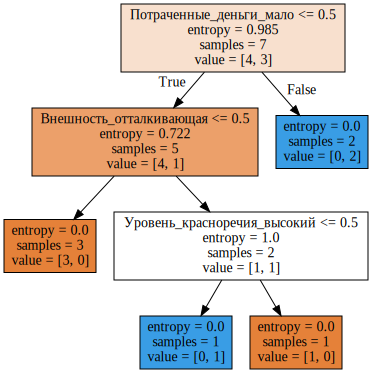

In [9]:
graph = Source(export_graphviz(dt, out_file=None, feature_names=list(X_train), filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
df_train[["Внешность_приятная" ,"Поедет"]]

In [ ]:
start_enropy = - 3/7 * np.log2(3/7) - 4/7 * np.log2(4/7)
start_enropy

In [ ]:
entropy_1 = - 1/4 * np.log2(1/4) - 3/4 * np.log2(3/4)
entropy_1

In [ ]:
entropy_0 = - 1/3 * np.log2(1/3) - 2/3 * np.log2(2/3)
entropy_0

In [ ]:
Eyx = (4/7) * entropy_1 + entropy_0 * (3/7)
IG = start_enropy - Eyx
IG